<a href="https://colab.research.google.com/github/jackmwallace/DS1002/blob/main/Final_Jack_Wallace_Lab_FTX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [ ]:
# Not done in a group

I enjoyed this lab more than any previous assignment because it seemed like analysis that would actually go into a meeting or in a PowerPoint to show to a group of people to convey information, which was a powerful accumulation of the stuff Professor Abrams has been going over. I had to figure out how to not have the timestamps be a weird black mass under the x-axis (plt.xticks([])), and overall the assignment took about two hours. I thought it was a bit weird that I had to cast something as float64, but that seemed to be the easiest way for the .diff() function to work. I had a bit of experience with combining graphs but getting it to look good took about thirty minutes.

## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [ ]:
import pandas as pd
import numpy as np

# Access the data remotely
ftx = pd.read_csv('https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv')

# Print a preview of the data frame
print(ftx.head(3))

  timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp
0  2022-12-31T00:00:00.000Z;"2022-12-31T23:59:59....                                
1  2022-12-30T00:00:00.000Z;"2022-12-30T23:59:59....                                
2  2022-12-29T00:00:00.000Z;"2022-12-29T23:59:59....                                


## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [ ]:
# Gets the number of rows and columns
num_rows, num_cols = ftx.shape

print("Number of rows:", num_rows,"\nNumber of columns:", num_cols,"\n")

Number of rows: 741 
Number of columns: 1 



## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [ ]:
nftx = ftx['timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp'].str.split(';', expand=True)
nftx.columns = ['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'open', 'high', 'low', 'close', 'volume', 'marketCap', 'timestamp']
nftx = nftx.drop(columns=['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap'])
nftx = nftx.drop_duplicates()
print(nftx.head(3))

           open          high           low         close      volume  \
0  0.8389684425   0.853501666  0.8352262088  0.8426884241  3001502.06   
1   0.860193073   0.864751879  0.8266428992  0.8390481756  3608615.07   
2  0.8857226476  0.8871175386  0.8430286751  0.8602311608  3766979.57   

                    timestamp  
0  "2022-12-31T23:59:59.999Z"  
1  "2022-12-30T23:59:59.999Z"  
2  "2022-12-29T23:59:59.999Z"  


Now display the first 10 rows of the cleaned dataset.

In [ ]:
print(nftx.head(10))

           open          high           low         close       volume  \
0  0.8389684425   0.853501666  0.8352262088  0.8426884241   3001502.06   
1   0.860193073   0.864751879  0.8266428992  0.8390481756   3608615.07   
2  0.8857226476  0.8871175386  0.8430286751  0.8602311608   3766979.57   
3  0.9211619958  0.9257015248  0.8698420242  0.8860908765   4192949.85   
4  0.9311378574  0.9554017418  0.9164143458  0.9236676658   4574953.05   
5  0.8945671492  1.0111825828  0.8936523976  0.9306958402   7065306.21   
6  0.9244321852  0.9355165843  0.8943699316   0.894656646   2577834.83   
7  0.9575050529  0.9756714327  0.9210848028  0.9244326068   5055004.16   
8  1.0271327165  1.0382822479   0.948058351  0.9570063953  17088962.94   
9  0.8739733875  1.1271983252  0.8356250943  1.0271616025  22418556.51   

                    timestamp  
0  "2022-12-31T23:59:59.999Z"  
1  "2022-12-30T23:59:59.999Z"  
2  "2022-12-29T23:59:59.999Z"  
3  "2022-12-28T23:59:59.999Z"  
4  "2022-12-27T23:59:59.9

## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [ ]:
nftx['close'] = nftx['close'].astype('float64')
nftx['close_change'] = nftx['close'].diff()
print(nftx.head(3))

           open          high           low     close      volume  \
0  0.8389684425   0.853501666  0.8352262088  0.842688  3001502.06   
1   0.860193073   0.864751879  0.8266428992  0.839048  3608615.07   
2  0.8857226476  0.8871175386  0.8430286751  0.860231  3766979.57   

                    timestamp  close_change  
0  "2022-12-31T23:59:59.999Z"           NaN  
1  "2022-12-30T23:59:59.999Z"     -0.003640  
2  "2022-12-29T23:59:59.999Z"      0.021183  


## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [ ]:
# Sort nftx by the 'close_change' column in descending order
closing_nftx = nftx.sort_values(by='close_change', ascending=False)

# Print the table of the top 10 days with their respective closing growth rates
print(closing_nftx[['timestamp', 'close_change']].head(10))

                      timestamp  close_change
56   "2022-11-07T23:59:59.999Z"     16.623292
468  "2021-09-16T23:59:59.999Z"     14.497738
598  "2021-05-18T23:59:59.999Z"     14.017812
478  "2021-09-15T23:59:59.999Z"      9.506381
473  "2021-09-19T23:59:59.999Z"      8.315742
484  "2021-09-09T23:59:59.999Z"      6.929033
350  "2022-01-20T23:59:59.999Z"      6.770635
594  "2021-05-22T23:59:59.999Z"      6.228516
481  "2021-09-12T23:59:59.999Z"      5.201864
605  "2021-05-11T23:59:59.999Z"      5.154806


## 6. Calculate the Percentage Rate of Change

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [ ]:
# Calculate the rate of change based on the "close_change" column
nftx['rate_of_change'] = nftx['close_change'].pct_change()
print(nftx[['close_change', 'rate_of_change']].head(8))

   close_change  rate_of_change
0           NaN             NaN
1     -0.003640             NaN
2      0.021183       -6.819104
3      0.025860        0.220778
4      0.037577        0.453101
5      0.007028       -0.812965
6     -0.036039       -6.127817
7      0.029776       -1.826211


## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [ ]:
# Sort nftx by the 'rate_of_change' column in descending order
fast_close_nftx = nftx.sort_values(by='rate_of_change', ascending=False)

# Sort nftx by the 'rate_of_change' column in ascending order
slow_close_nftx = nftx.sort_values(by='rate_of_change', ascending=True)

# Print the table of the top 5 days with their respective rate of change for closing
print(fast_close_nftx[['timestamp', 'rate_of_change']].head(5),"\n")
# Print the table of the bottom 5 days with their respective rate of change for closing
print(slow_close_nftx[['timestamp', 'rate_of_change']].head(5))

                      timestamp  rate_of_change
110  "2022-09-14T23:59:59.999Z"      273.028254
516  "2021-08-08T23:59:59.999Z"      216.674634
182  "2022-07-06T23:59:59.999Z"      178.229185
369  "2021-12-31T23:59:59.999Z"       97.180950
216  "2022-06-02T23:59:59.999Z"       58.778546 

                      timestamp  rate_of_change
135  "2022-08-20T23:59:59.999Z"    -1146.635171
240  "2022-05-10T23:59:59.999Z"     -370.048919
446  "2021-10-15T23:59:59.999Z"     -166.691725
193  "2022-06-25T23:59:59.999Z"      -83.605800
306  "2022-03-05T23:59:59.999Z"      -79.028500


## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

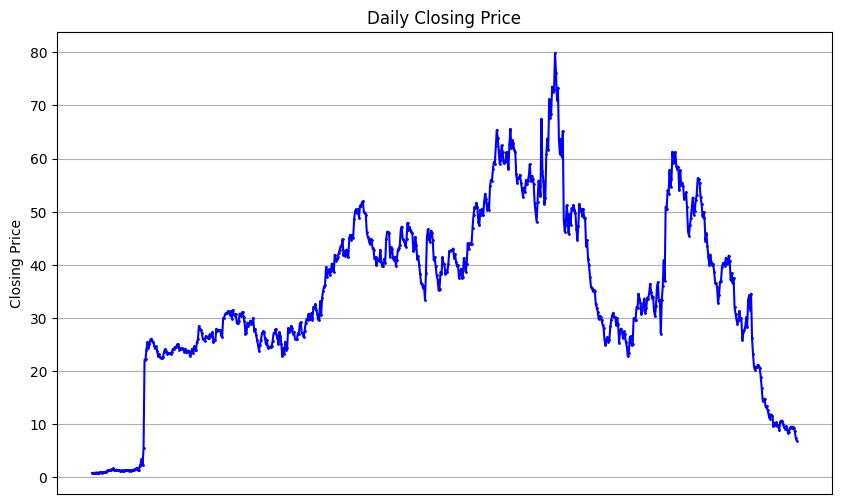

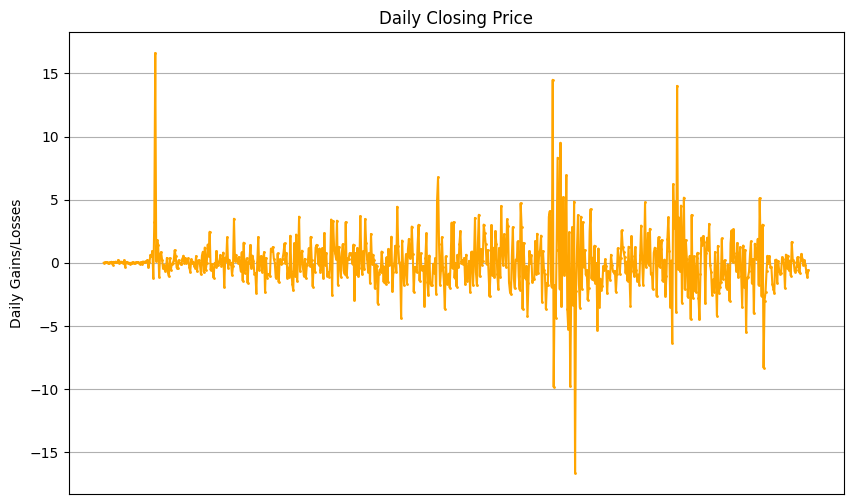

In [ ]:
import matplotlib.pyplot as plt

# Plot the daily closing price
plt.figure(figsize=(10, 6))  # Size
plt.plot(nftx['timestamp'], nftx['close'], color='blue', marker='o', markersize= 1, linestyle='-', linewidth=1.5)  # Plotting the closing price
plt.title('Daily Closing Price')  # Set the title of the plot
plt.ylabel('Closing Price')  # Set the label for the y-axis
plt.xticks([])
plt.grid(True)  # Add gridlines
plt.show()  # Show the plot

# Plot the daily gains/losses
plt.figure(figsize=(10, 6))  # Size
plt.plot(nftx['timestamp'], nftx['close_change'], color='orange', marker='o', markersize= 1, linestyle='-', linewidth=1.5)  # Plotting the closing price
plt.title('Daily Closing Price')  # Set the title of the plot
plt.ylabel('Daily Gains/Losses')  # Set the label for the y-axis
plt.xticks([])
plt.grid(True)  # Add gridlines
plt.show()  # Show the plot

Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

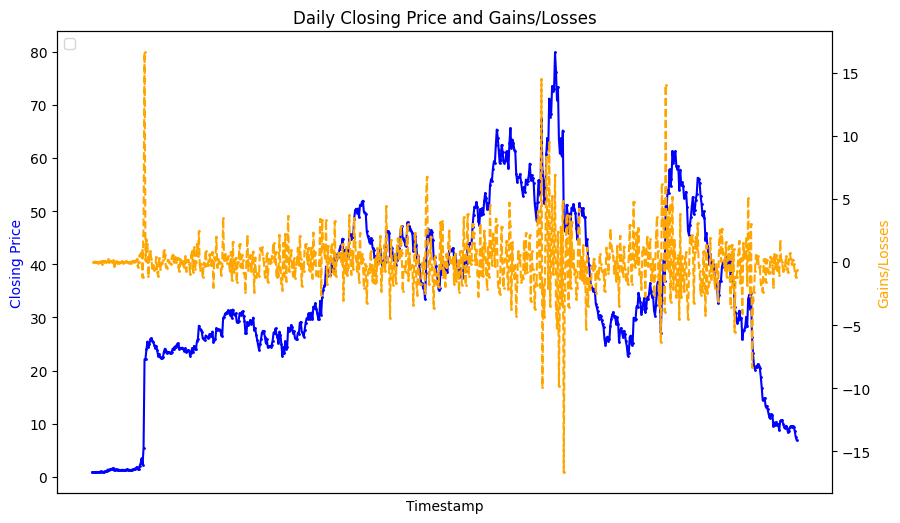

In [ ]:
# Create a figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the daily closing price
ax1.plot(nftx['timestamp'], nftx['close'], color='blue', marker='o', markersize= 1, linestyle='-', linewidth=1.5)
ax1.set_ylabel('Closing Price', color='blue')

# Create a twin axis for the gains/losses
ax2 = ax1.twinx()
ax2.plot(nftx['timestamp'], nftx['close_change'], color='orange',  marker='o', markersize= 1, linestyle='--', linewidth=1.5)
ax2.set_ylabel('Gains/Losses', color='orange')

# Set the combined x-axis label
ax1.set_xlabel('Timestamp')
plt.title('Daily Closing Price and Gains/Losses')

# Show legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='upper left')
plt.xticks([])
plt.show()